In [1]:
import csv


In [35]:
path = r"C:\Users\Olaitan\Downloads\assessment1\acw_user_data.csv"

fp = open(path, "r")
reader = csv.DictReader(fp)

for row in reader:
    print(row)

OrderedDict([('Address Street', '70 Lydia isle'), ('Address City', 'Lake Conor'), ('Address Postcode', 'S71 7XZ'), ('Age (Years)', '89'), ('Distance Commuted to Work (miles)', '0'), ('Employer Company', 'N/A'), ('Credit Card Start Date', '08/18'), ('Credit Card Expiry Date', '11/27'), ('Credit Card Number', '676373692463'), ('Credit Card CVV', '875'), ('Dependants', '3'), ('First Name', 'Kieran'), ('Bank IBAN', 'GB62PQKB71416034141571'), ('Last Name', 'Wilson'), ('Marital Status', 'married or civil partner'), ('Yearly Pension (GBP)', '7257'), ('Retired', 'True'), ('Yearly Salary (GBP)', '72838'), ('Sex', 'Male'), ('Vehicle Make', 'Hyundai'), ('Vehicle Model', 'Bonneville'), ('Vehicle Year', '2009'), ('Vehicle Type', 'Pickup')])
OrderedDict([('Address Street', '00 Wheeler wells'), ('Address City', 'Chapmanton'), ('Address Postcode', 'L2 7BT'), ('Age (Years)', '46'), ('Distance Commuted to Work (miles)', '13.72'), ('Employer Company', 'Begum-Williams'), ('Credit Card Start Date', '08/12'

### Question 1 and 2

In [17]:
path = r"C:\Users\ajayi\Downloads\assessment1\acw_user_data.csv"

# function to read data from path
def get_data(path):
    file = open(path, "r")
    reader = csv.DictReader(file)
    return reader

default_value = 999
# function to take a file and process it
def get_row_data(row):
    global default_value
    data = {}
    Add_file = {}
    V_file = {}
    Cred_file = {}
    Address_list = []
    Cred_list = []
    Veh_list = []
    Add_file["Street"] = row['Address Street']  
    Add_file["City"] = row['Address City']
    Add_file["Pcode"] = row['Address Postcode']
    Address_list.append(Add_file)
    data["Address"] = Address_list

    data["Age"] = int(row['Age (Years)'])
    data["Dist"] = float(row['Distance Commuted to Work (miles)'])
    data["Emp_Comp"] = row['Employer Company']
    Cred_file["Cred_start"] = row['Credit Card Start Date']
    Cred_file["Cred_expiry"] = row['Credit Card Expiry Date']
    Cred_file["Cred_no"] = int(row['Credit Card Number'])
    Cred_file["Cred_cvv"] = int(row['Credit Card CVV'])
    Cred_file["Bank_iban"] = row['Bank IBAN']
    Cred_list.append(Cred_file)
    data["Credit_card"] = Cred_list
    dep = row['Dependants']
    if dep == "" or dep == " ":  # fill the missing values in dependants with default value
        data["dep"] = default_value
        default_value = default_value + 1   # incrementing default value used for dependants missing
    else:
        data["dep"] = int(row["Dependants"])

    data["F_name"] = row['First Name']
    data["L_name"] = row['Last Name']
    data["M_status"] = row['Marital Status']
    data["Pension"] = float(row['Yearly Pension (GBP)'])
    data["Retired"] = row['Retired'].lower().capitalize() == "True"
    data["Salary"] = float(row['Yearly Salary (GBP)'])
    data["Sex"] = row["Sex"]
    V_file["V_make"] = row['Vehicle Make']
    V_file["V_model"] = row['Vehicle Model']
    V_file["V_year"] = int(row['Vehicle Year'])
    V_file["V_type"] = row['Vehicle Type']
    Veh_list.append(V_file)
    data["Vehicle"] = Veh_list
    return data
        
    

In [18]:
reader = get_data(path)  # get the data and read the contents

result = []
for row in reader:
    data = get_row_data(row)  # process each row of the data
    result.append(data)

#### Question 3

In [19]:
dependants = []

for line in result:
    dep = line["dep"]
    if dep >= 999:  # filling the missing values with weird value
        dependants.append(dep)
        
print(dependants)

[999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017]


### Question 4

In [20]:
import json


with open("processed.json", "w") as fp:
    json.dump(result, fp, indent = 2)
    fp.close()

In [21]:
result

[{'Address': [{'Street': '70 Lydia isle',
    'City': 'Lake Conor',
    'Pcode': 'S71 7XZ'}],
  'Age': 89,
  'Dist': 0.0,
  'Emp_Comp': 'N/A',
  'Credit_card': [{'Cred_start': '08/18',
    'Cred_expiry': '11/27',
    'Cred_no': 676373692463,
    'Cred_cvv': 875,
    'Bank_iban': 'GB62PQKB71416034141571'}],
  'dep': 3,
  'F_name': 'Kieran',
  'L_name': 'Wilson',
  'M_status': 'married or civil partner',
  'Pension': 7257.0,
  'Retired': True,
  'Salary': 72838.0,
  'Sex': 'Male',
  'Vehicle': [{'V_make': 'Hyundai',
    'V_model': 'Bonneville',
    'V_year': 2009,
    'V_type': 'Pickup'}]},
 {'Address': [{'Street': '00 Wheeler wells',
    'City': 'Chapmanton',
    'Pcode': 'L2 7BT'}],
  'Age': 46,
  'Dist': 13.72,
  'Emp_Comp': 'Begum-Williams',
  'Credit_card': [{'Cred_start': '08/12',
    'Cred_expiry': '11/26',
    'Cred_no': 4529436854129855,
    'Cred_cvv': 583,
    'Bank_iban': 'GB37UMCO54540228728019'}],
  'dep': 1,
  'F_name': 'Jonathan',
  'L_name': 'Thomas',
  'M_status': 'marr

### Question 5a

In [23]:
retired_ind = []

for ind, line in enumerate(result):
    if line["Retired"] == True:
        retired_ind.append(ind)   # save the index of the employee who has retired
        
retired = []

for ind in retired_ind:
    emp = result[ind]
    retired.append(emp)


### Helper function
- Function to write json results

In [25]:
def write_json(json_name, my_result):
    with open(json_name, "w") as fp:
        json.dump(my_result, fp, indent = 2)
        fp.close()

In [26]:
write_json("retired.json", retired)  # saves retired output

In [27]:
write_json("processed.json", result)  # saves processed data

### Question 5b

In [30]:
employed_ind = []

for ind, line in enumerate(result):
    if line["Emp_Comp"] != "N/A":
        employed_ind.append(ind)
        
employed = []

for ind in employed_ind:
    emp = result[ind]
    employed.append(emp)

In [31]:
employed

[{'Address': [{'Street': '00 Wheeler wells',
    'City': 'Chapmanton',
    'Pcode': 'L2 7BT'}],
  'Age': 46,
  'Dist': 13.72,
  'Emp_Comp': 'Begum-Williams',
  'Credit_card': [{'Cred_start': '08/12',
    'Cred_expiry': '11/26',
    'Cred_no': 4529436854129855,
    'Cred_cvv': 583,
    'Bank_iban': 'GB37UMCO54540228728019'}],
  'dep': 1,
  'F_name': 'Jonathan',
  'L_name': 'Thomas',
  'M_status': 'married or civil partner',
  'Pension': 0.0,
  'Retired': False,
  'Salary': 54016.0,
  'Sex': 'Male',
  'Vehicle': [{'V_make': 'Nissan',
    'V_model': 'ATS',
    'V_year': 1996,
    'V_type': 'Coupe'}]},
 {'Address': [{'Street': 'Studio 33K Joel walk',
    'City': 'Randallborough',
    'Pcode': 'ME3N 1GH'}],
  'Age': 22,
  'Dist': 16.02,
  'Emp_Comp': 'Hill-Wright',
  'Credit_card': [{'Cred_start': '11/19',
    'Cred_expiry': '07/27',
    'Cred_no': 4091726363083888495,
    'Cred_cvv': 422,
    'Bank_iban': 'GB40CVUE84011545859591'}],
  'dep': 1,
  'F_name': 'Antony',
  'L_name': 'Jones',
  

In [34]:
write_json(r"C:\Users\ajayi\Downloads\assessment1\employed.json", employed)

### Question 6

In [39]:
# Grab the Card start year and end year
# convert both into integer
# take the difference
# if difference is more than 10 years
# flag the employee

def remove_card(row):
    flag = True
    cred_start = int(row["Credit Card Start Date"][-2:])  # grab the start year
    cred_end = int(row["Credit Card Expiry Date"][-2:]) # grab the end year
    diff = cred_end - cred_start
    if diff < 10:
        flag = False
    return flag

In [40]:
reader = get_data(path)

flag_result = []

for row in reader:
    flag = remove_card(row)
    row["flag"] = flag
    flag_result.append(row)

In [42]:
write_json("remove_ccard.json", flag_result)

### Question 7a

In [46]:
# load the processed json file
fp = open("processed.json")
processed = json.load(fp)

salary_commute = []

for line in processed:
    dist = line["Dist"]
    salary = line["Salary"]
    if dist <= 1:
        line["Salary-Commute"] = salary
    else:
        line["Salary-Commute"] = salary / dist
    salary_commute.append(line)

### Question 7b

In [48]:
salary_commute.sort(key = lambda x: x["Salary-Commute"])

### Question 7c

In [50]:
write_json("commute.json", salary_commute)

### Data Visualization

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# load the data
acw = pd.read_csv(path)

# check the first rows 
acw.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


In [53]:
acw.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

### Question 1a and 1b

In [54]:
mean_salary = acw["Yearly Salary (GBP)"].mean()
median_age = acw["Age (Years)"].median()

### Question 2a

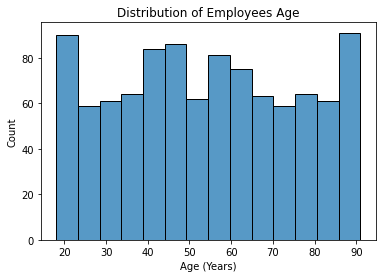

In [65]:
# calculate no of bins
age_mx =  acw["Age (Years)"].max()

age_min =  acw["Age (Years)"].min()

diff = age_mx - age_min

n_bins = diff // 5

n_bins

sns.histplot(data = acw, x = "Age (Years)", bins=n_bins)
plt.title("Distribution of Employees Age");

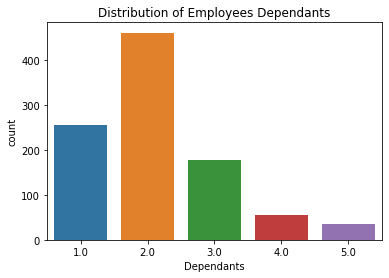

In [68]:
### Question 2b

sns.countplot(data = acw, x = "Dependants")
plt.title("Distribution of Employees Dependants");

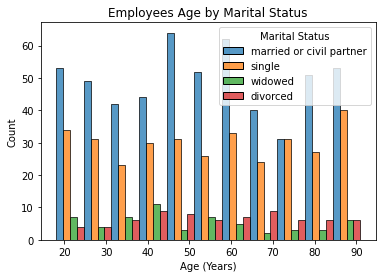

In [75]:
### Question 2c

sns.histplot(data = acw, x = "Age (Years)", hue = "Marital Status", multiple="dodge")
plt.title("Employees Age by Marital Status");

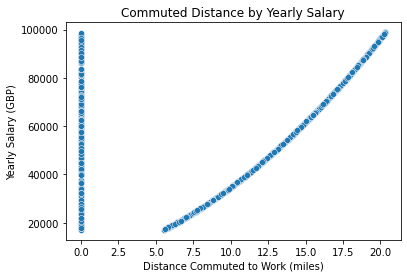

In [76]:
### Question 3a

sns.scatterplot(data = acw, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')
plt.title("Commuted Distance by Yearly Salary");

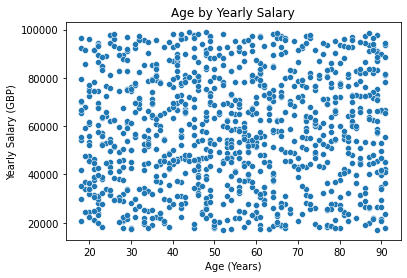

In [77]:
### Question 3b

sns.scatterplot(data = acw, x = 'Age (Years)', y = 'Yearly Salary (GBP)')
plt.title("Age by Yearly Salary");

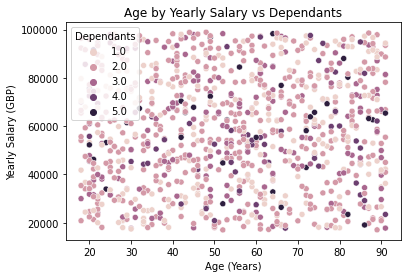

In [80]:
### Question 3c

sns.scatterplot(data = acw, x = 'Age (Years)', y = 'Yearly Salary (GBP)', hue = "Dependants")
plt.title("Age by Yearly Salary vs Dependants");


plt.savefig("age_salary_dependants.png")

In [79]:
plt.savefig("age_salary_dependants.png")

<Figure size 432x288 with 0 Axes>